## STEP 4: Evaluation & Interpretation


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from pathlib import Path

# Set up directories
RESULTS_DIR = Path("/content/results")

# Load preprocessed data
df = pd.read_csv(RESULTS_DIR / "/content/results/preprocessed_trials.csv")
print(f"✅ Loaded preprocessed_trials.csv (Shape: {df.shape})")

# Define EEG features (adjust based on actual column names)
modalities = {
    'EEG': [col for col in df.columns if col.startswith('EEG_') or col.startswith('PCA_')]
}
y = df['Target_encoded']  # Binary target (Correct=1, Incorrect=0)

# Load the EEG baseline model
teacher_model = xgb.XGBClassifier()
teacher_model.load_model(RESULTS_DIR / "/content/results/eeg_baseline.json")
print("✅ Loaded EEG teacher model")

# Prepare EEG data
X_eeg = df[modalities['EEG']].select_dtypes(include=[np.number]).fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X_eeg, y, test_size=0.2, random_state=42, stratify=y)

# Evaluate teacher model (recompute metrics on test set for consistency)
y_pred = teacher_model.predict(X_test)
y_prob = teacher_model.predict_proba(X_test)[:, 1]
teacher_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_prob)
}
print(f"✅ Teacher (EEG) Metrics: {teacher_metrics}")

# 4.1 Metrics (Placeholder for Student Models)
# Note: Student metrics will be added once Eye, GSR, and Facial features are available
student_metrics = {}
print("⚠️ Student metrics unavailable due to missing Eye, GSR, and Facial features. Placeholder: {}".format(student_metrics))

# 4.2 Interpretability
# SHAP analysis for EEG teacher model
explainer = shap.Explainer(teacher_model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot for EEG Teacher Model")
plt.savefig(RESULTS_DIR / "/content/results/shap_eeg_summary.png")
plt.close()
print("✅ Saved SHAP summary plot for EEG teacher model")

# Identify top features (example based on SHAP values)
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
top_features = shap_values_df.abs().mean().sort_values(ascending=False).head(5).index.tolist()
print(f"✅ Top 5 most influential features: {top_features}")

# Save evaluation results
evaluation_results = {
    'Teacher_Metrics': teacher_metrics,
    'Student_Metrics': student_metrics,
    'Top_Features': top_features
}
pd.DataFrame([evaluation_results]).to_csv(RESULTS_DIR / "evaluation_results.csv", index=False)
print("✅ Saved evaluation results to evaluation_results.csv")

print("✅ Step 4 Complete - Evaluation & Interpretation done (with limitations)")

✅ Loaded preprocessed_trials.csv (Shape: (425096, 12))
✅ Loaded EEG teacher model
✅ Teacher (EEG) Metrics: {'Accuracy': 0.6213126323218067, 'F1-score': 0.5263064971751412, 'ROC-AUC': np.float64(0.7594613012613253)}
⚠️ Student metrics unavailable due to missing Eye, GSR, and Facial features. Placeholder: {}


100%|===================| 84795/85020 [02:37<00:00]       /tmp/ipython-input-2387444169.py:50: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, show=False)


✅ Saved SHAP summary plot for EEG teacher model
✅ Top 5 most influential features: ['PCA_3', 'PCA_1', 'PCA_8', 'PCA_10', 'PCA_5']
✅ Saved evaluation results to evaluation_results.csv
✅ Step 4 Complete - Evaluation & Interpretation done (with limitations)


In [ ]:
for pid in range(1, 39):
    subdir_path = base_dir / str(pid)
    print(f"🔍 P{pid}: Checking {subdir_path}: {[f.name for f in subdir_path.glob('*')]}")

🔍 P1: Checking /content/drive/MyDrive/STData/STData/1: ['1_PSY.csv', '1_EEG.csv', '1_EYE.csv', '.DS_Store', '1_IVT.csv', '1_externalEvents.csv', '1_BlankScreenData.csv', '1_NSTLX.csv', '1_TIVA.csv', '1_GSR.csv', '1_DLOT.xlsx']
🔍 P2: Checking /content/drive/MyDrive/STData/STData/2: ['2_PSY.csv', '2_DLOT.xlsx', '2_externalEvents.csv', '.DS_Store', '2_BlankScreenData.csv', '2_TIVA.csv', '2_EEG.csv', '2_IVT.csv', '2_GSR.csv', '2_NSTLX.csv', '2_EYE.csv']
🔍 P3: Checking /content/drive/MyDrive/STData/STData/3: ['3_BlankScreenData.csv', '3_TIVA.csv', '3_GSR.csv', '3_NSTLX.csv', '3_EEG.csv', '3_externalEvents.csv', '.DS_Store', '3_IVT.csv', '3_EYE.csv', '3_PSY.csv']
🔍 P4: Checking /content/drive/MyDrive/STData/STData/4: ['4_BlankScreenData.csv', '.DS_Store', '4_IVT.csv', '4_externalEvents.csv', '4_PSY.csv', '4_NSTLX.csv', '4_EYE.csv', '4_EEG.csv', '4_GSR.csv', '4_TIVA.csv']
🔍 P5: Checking /content/drive/MyDrive/STData/STData/5: ['5_GSR.csv', '5_DLOT.xlsx', '5_externalEvents.csv', '5_EYE.csv', '

100%|===================| 424780/425096 [12:52<00:00]       /tmp/ipython-input-204361057.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_eeg, show=False)


✅ Saved SHAP summary for EEG


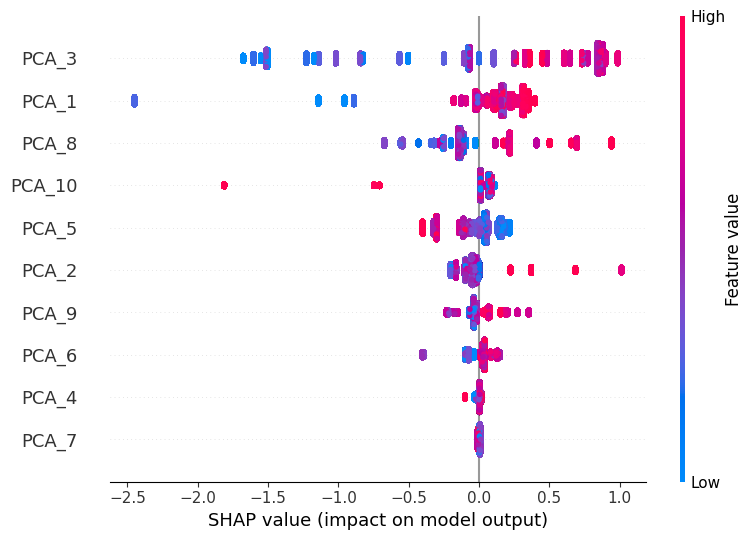

In [ ]:
import shap
import matplotlib.pyplot as plt

# Load EEG data and model
X_eeg = df[modalities['EEG']].select_dtypes(include=[np.number]).fillna(0)
teacher_model = xgb.XGBClassifier()
teacher_model.load_model(RESULTS_DIR / "/content/results/eeg_baseline.json")

# SHAP analysis
explainer = shap.Explainer(teacher_model, X_eeg)
shap_values = explainer(X_eeg)
shap.summary_plot(shap_values, X_eeg, show=False)
plt.savefig(RESULTS_DIR / "shap_eeg_summary.png")
print("✅ Saved SHAP summary for EEG")